# Titanic Dataset Exploratory Data Analysis
 

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

Dataset: https://www.kaggle.com/c/titanic/data

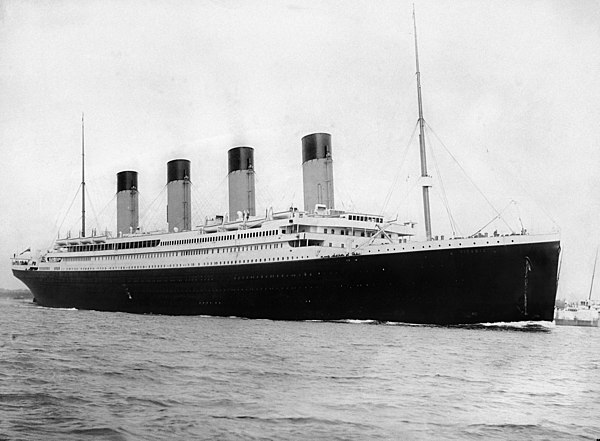

### About the Dataset

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Data Preprocessing

**Importing Packages and Modules.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 80

In [3]:
titanic = sns.load_dataset('titanic')

**Viewing the top 5 rows of the data.**

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**List of all the columns in the dataset.**

In [5]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

**Summary of Data.**

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Datatype of the dataset columns.**

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# Heatmap

In [8]:
plt.style.use('ggplot')

**Checking for null data in the dataset.**

In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Heatmap of the missing values.**

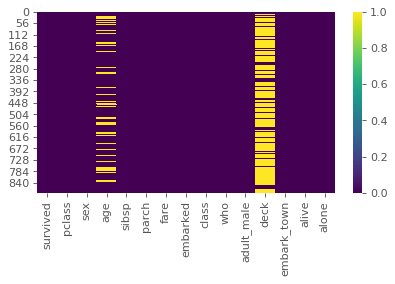

In [10]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = True)

**Correlation Matrix of the columns.**

In [11]:
corrmat = titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


**Heatmap for the Corerelation Matrix.**

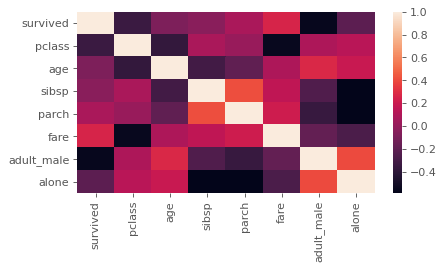

In [12]:
sns.heatmap(corrmat)

# Univariate Analysis 

In [13]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


**Univariate Analysis of Every Feature/Column in the Dataset.**

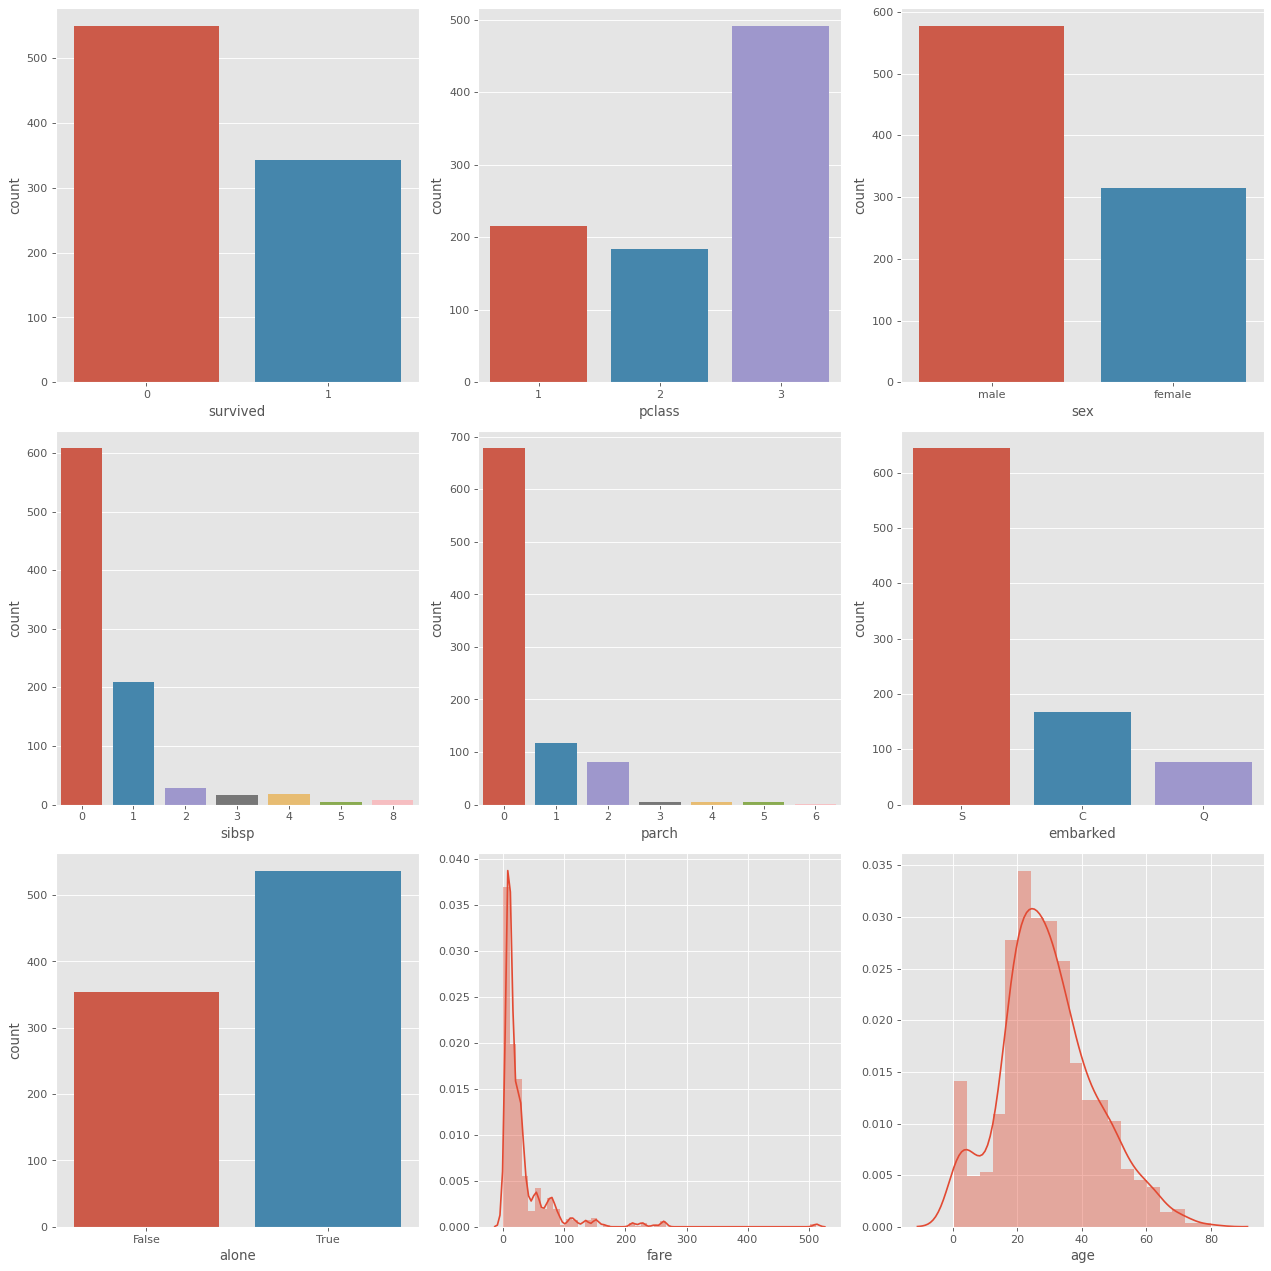

In [14]:
fig, ax = plt.subplots(3, 3, figsize = (16, 16))

sns.countplot('survived', data = titanic, ax = ax[0][0])
sns.countplot('pclass', data = titanic, ax = ax[0][1])
sns.countplot('sex', data = titanic, ax = ax[0][2])
sns.countplot('sibsp', data = titanic, ax = ax[1][0])
sns.countplot('parch', data = titanic, ax = ax[1][1])
sns.countplot('embarked', data = titanic, ax = ax[1][2])
sns.countplot('alone', data = titanic, ax = ax[2][0])

sns.distplot(titanic['fare'], kde = True, ax = ax[2][1])
sns.distplot(titanic['age'], kde = True, ax = ax[2][2])

plt.tight_layout()

# Survived

In [15]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

**Off 891 people 342 survived and 549 died.**

**Count Plot for Survived People**

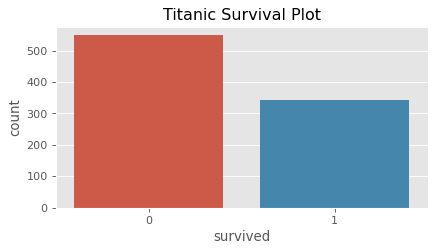

In [16]:
sns.countplot('survived', data = titanic)
plt.title('Titanic Survival Plot')
plt.show()

**Histogram for Survived People**

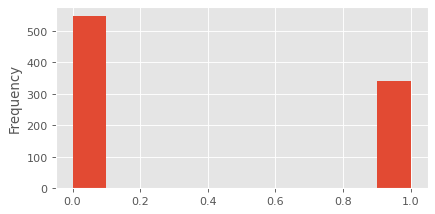

In [17]:
titanic['survived'].plot.hist()

**Different Pie Charts for Survived People**

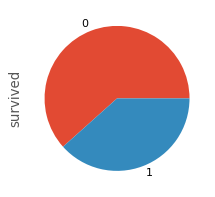

In [18]:
titanic['survived'].value_counts().plot.pie()

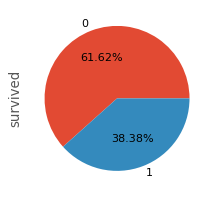

In [19]:
titanic['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

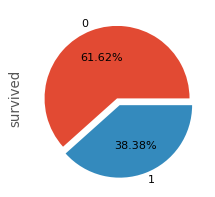

In [20]:
explode = [0, 0.1]
titanic['survived'].value_counts().plot.pie(explode = explode, autopct = '%1.2f%%')

# PClass

**Types of Passenger Class**

In [21]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

**There are 216 people of PClass 1, 184 people of PClass 2, and 491 people of PClass 3.**

In [22]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

**Count Plot for PClass.**

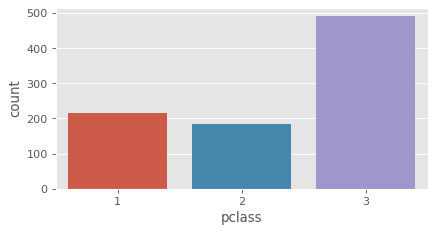

In [23]:
sns.countplot('pclass', data = titanic)

**Count Plot for Survived People based on Survival.**

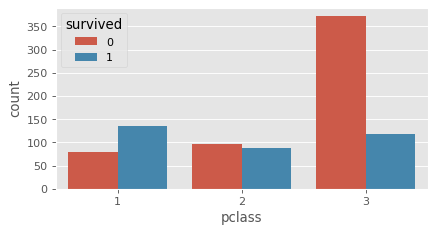

In [24]:
sns.countplot('pclass', data = titanic, hue = 'survived')

**Different Pie Chart for PClass.**

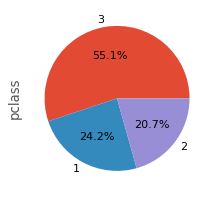

In [25]:
titanic['pclass'].value_counts().plot.pie(autopct = "%1.1f%%")

**Bar CatPlot for PClass vs Survived.**

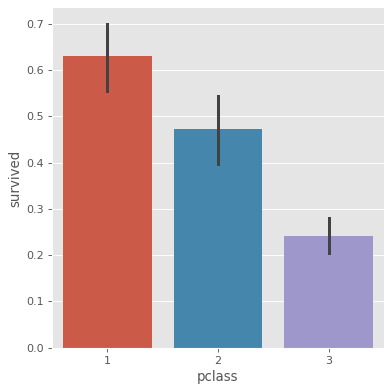

In [26]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic)

**Point CatPlot for PClass vs Survived.**

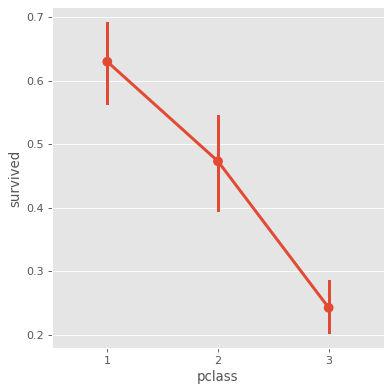

In [27]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic)

**Violin CatPlot for PClass vs Survived.**

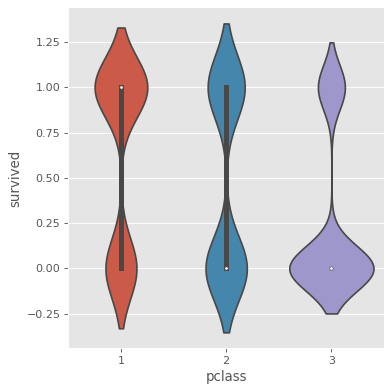

In [28]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'violin', data= titanic)

# Sex 

**Type of Gender/Sex of people onboard.**

In [30]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

**There are 577 males and 314 female passengers onboard.**

In [31]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

**Count Plot for Sex.**

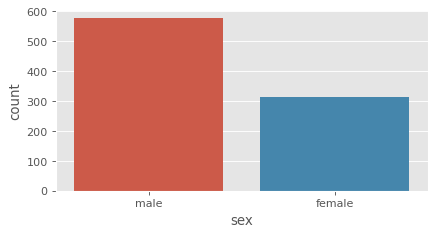

In [32]:
sns.countplot('sex', data = titanic)

**Count Plot for Sex based on Survival.**

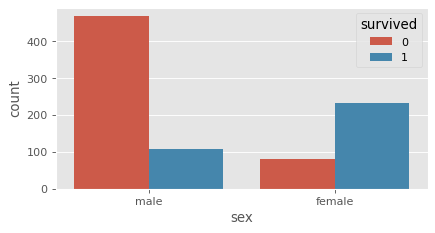

In [33]:
sns.countplot('sex', data = titanic, hue = 'survived')

**Different Pie Chart for Sex.**

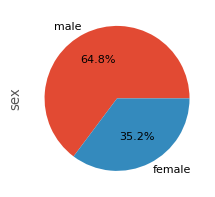

In [34]:
titanic['sex'].value_counts().plot.pie(autopct = '%1.1f%%')

**Bar CatPlot for Sex vs Survived.**

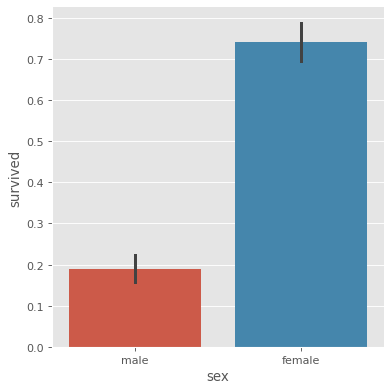

In [35]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic)

**Bar CatPlot for Sex vs Survived based on PClass.**

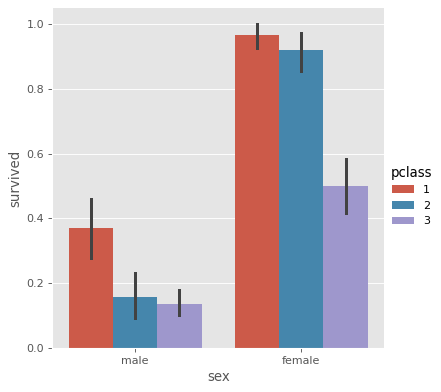

In [36]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')

**Bar CatPlot for Sex vs Survived based on PClass Columnwise.**

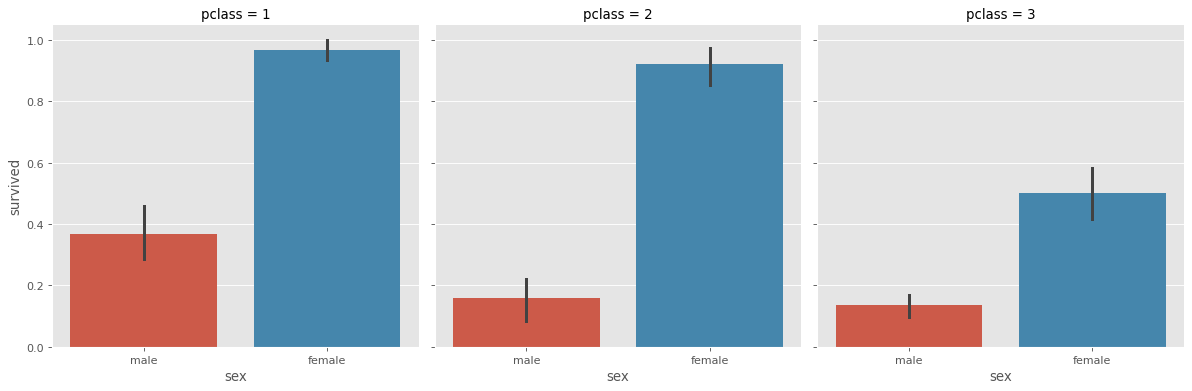

In [37]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, col = 'pclass')

**Bar CatPlot for Sex vs Survived based on PClass Rowwise.**

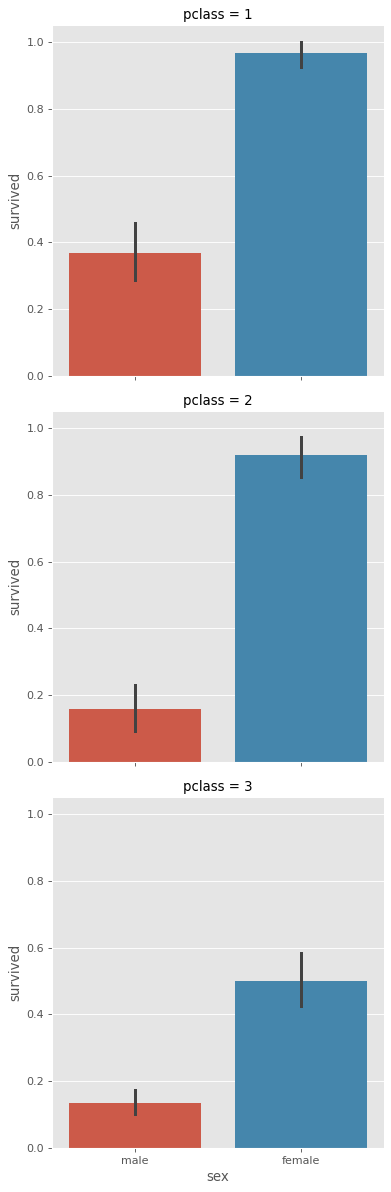

In [38]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, row = 'pclass')

**Bar CatPlot for PClass vs Survived based on Sex Columnwise.**

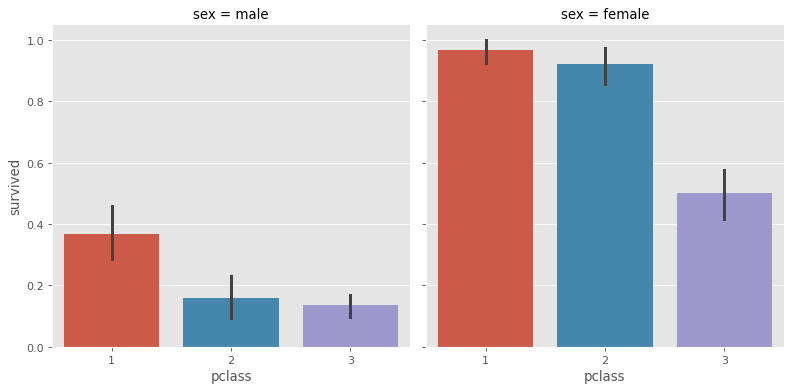

In [40]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

**Point CatPlot for Sex vs Survived.**

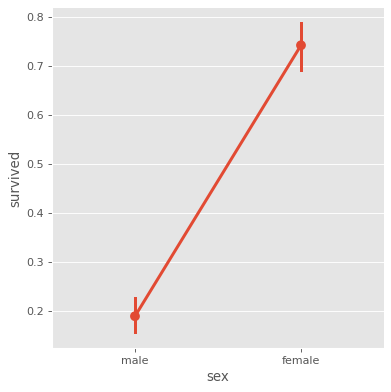

In [41]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic)

**Point CatPlot for Sex vs Survived based on PClass.**

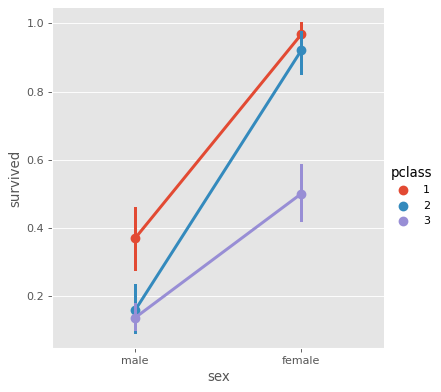

In [42]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic, hue = 'pclass')

**Point CatPlot for PClass vs Survived based on Sex.**

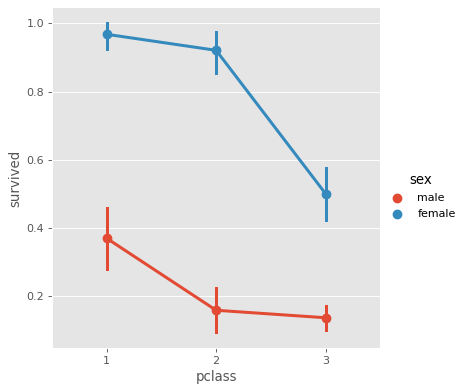

In [43]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic, hue = 'sex')

**Violin CatPlot for Sex vs Survived.**

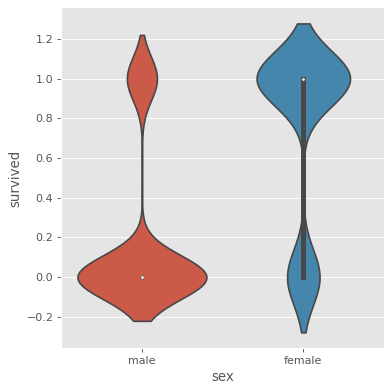

In [44]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic)

**Violin CatPlot for Sex vs Survived based on PClass.**

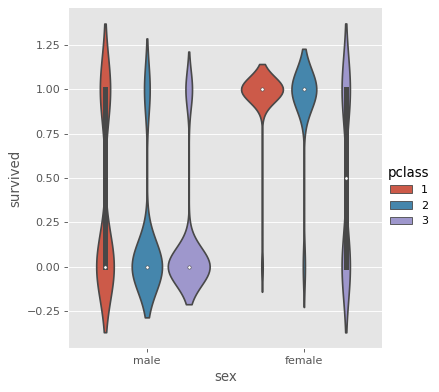

In [45]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, hue = 'pclass')

**Violin CatPlot for Sex vs Survived based on PClass Columnwise.**

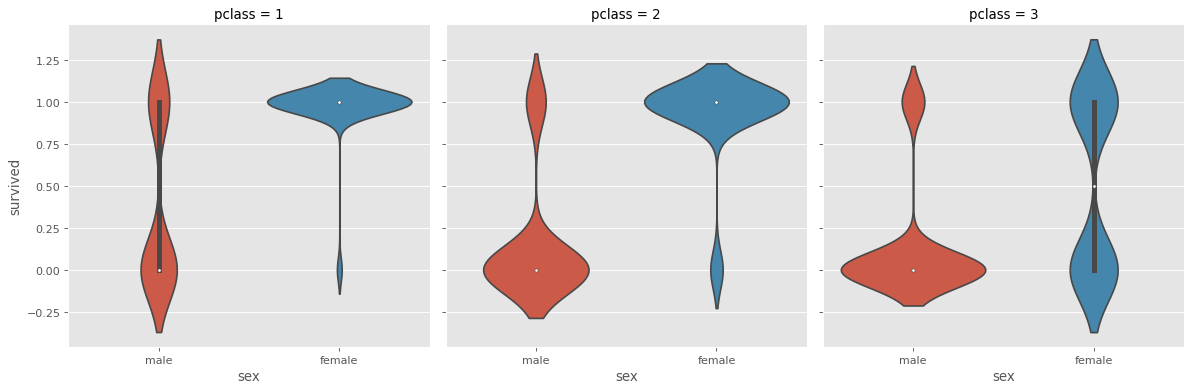

In [46]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, col = 'pclass')

# Age

**Histogram Representation of Age.**

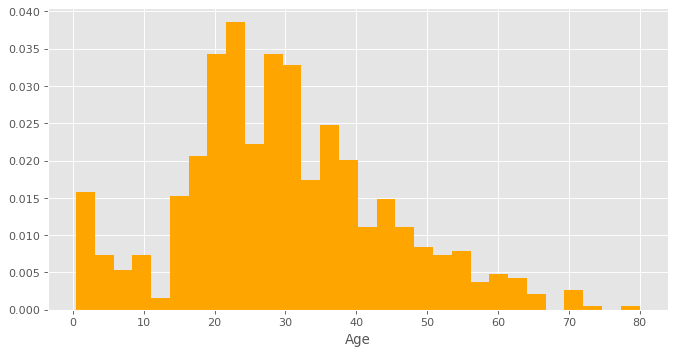

In [47]:
titanic['age'].hist(bins = 30, density = True, color = 'orange', figsize = (10, 5))
plt.xlabel('Age')
plt.show()

**DistPlot of Age of people.**

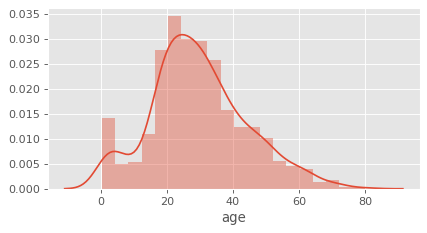

In [48]:
sns.distplot(titanic['age'])

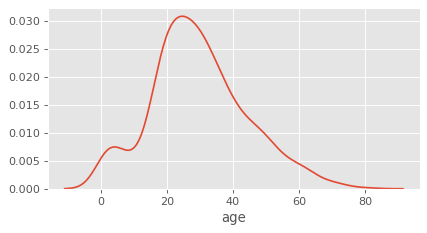

In [49]:
sns.distplot(titanic['age'], hist = False)

**KDEPlot of Age of People.**

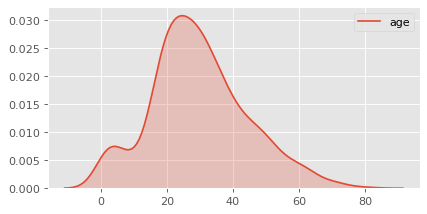

In [50]:
sns.kdeplot(titanic['age'], shade = True)

**Box CatPlot of Sex vs Age.**

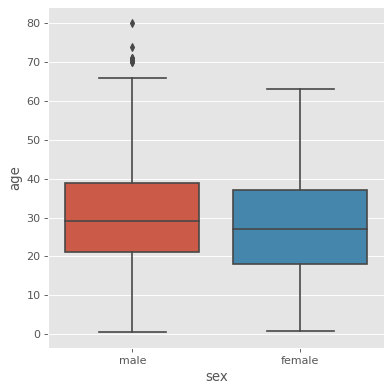

In [51]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box')

**Box CatPlot of Sex vs Age based on PClass.**

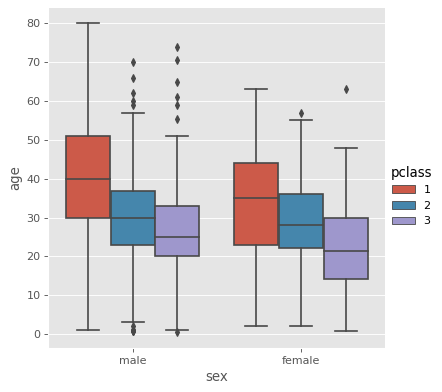

In [52]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', hue = 'pclass')

**Box CatPlot of Sex vs Age based on PClass Columnwise.**

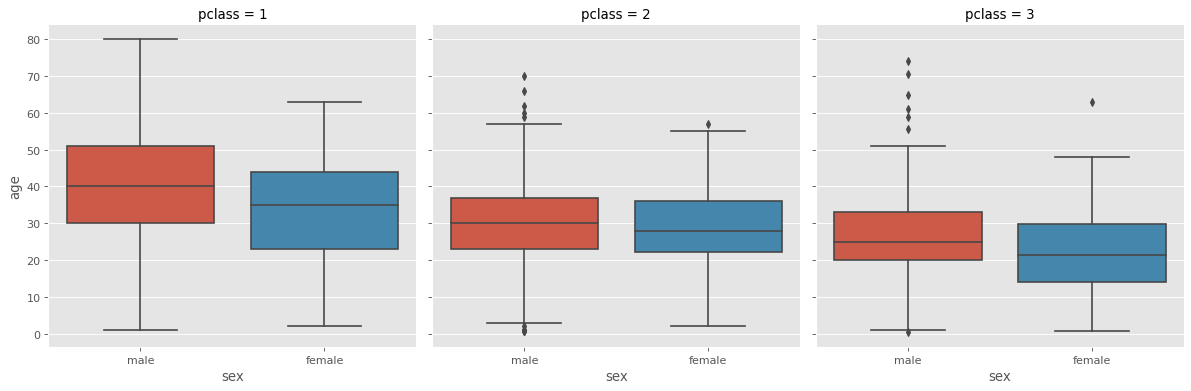

In [53]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', col = 'pclass')

**Violin CatPlot of PClass vs Age.**

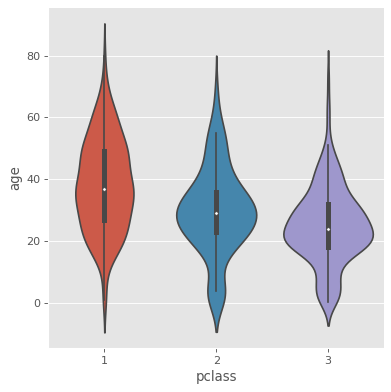

In [54]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin')

**Violin CatPlot of PClass vs Age based on Sex.**

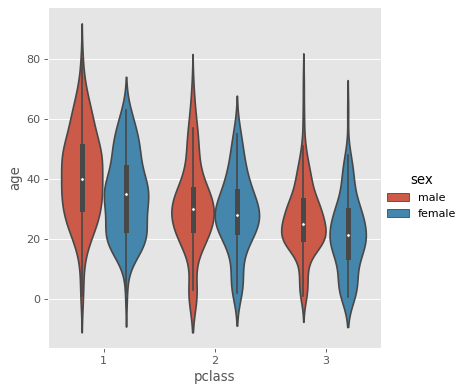

In [55]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', hue = 'sex')

**Violin CatPlot of PClass vs Age based on Sex Split.**

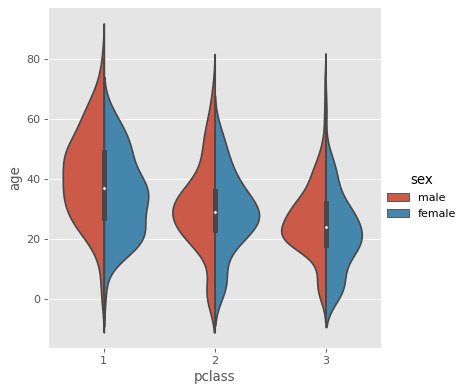

In [56]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', hue = 'sex', split = True)

**Violin CatPlot of PClass vs Age based on Sex Columnwise.**

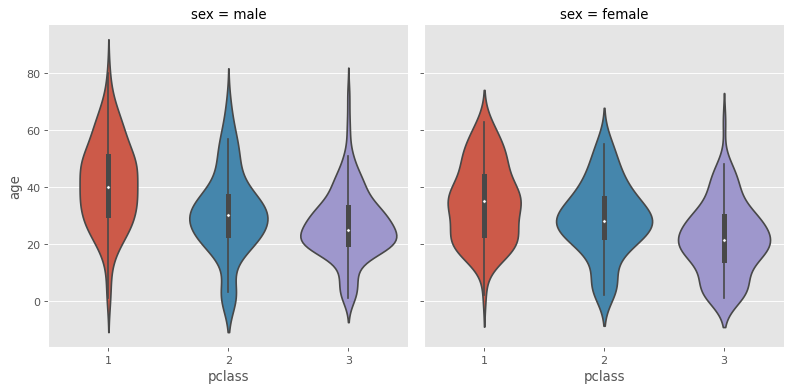

In [57]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', col = 'sex')

**Swarm CatPlot of PClass vs Age.**

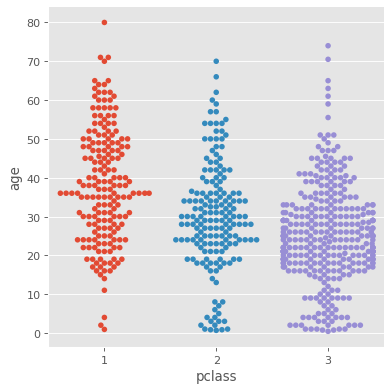

In [58]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic)

**Swarm CatPlot of PClass vs Age based on Sex Columnwise.**

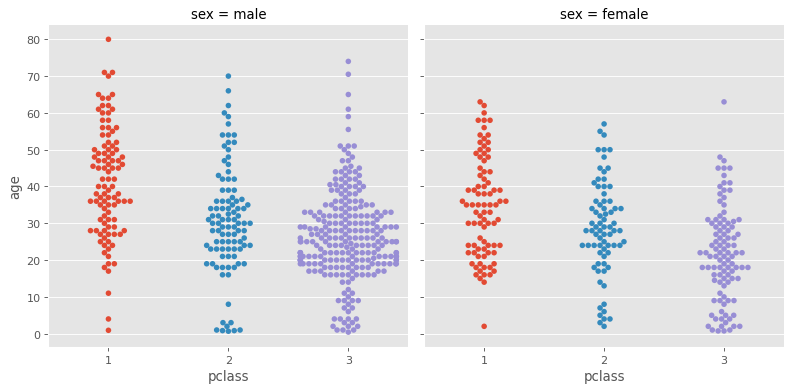

In [59]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, col = 'sex')

**Swarm CatPlot of Survived vs Age based on Sex Columnwise.**

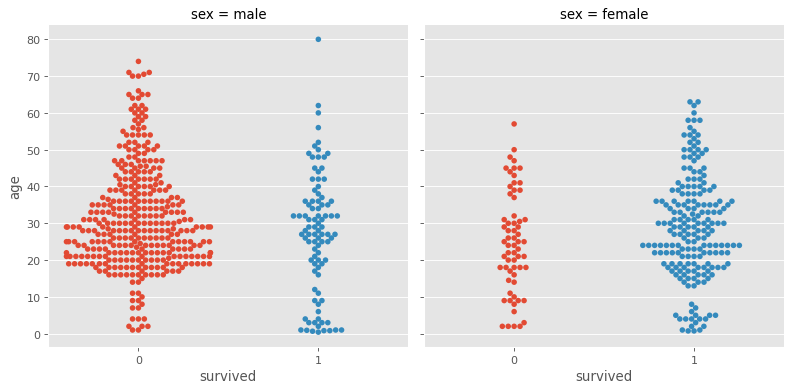

In [60]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', col = 'sex')

**Swarm CatPlot of Survived vs Age based on Sex Rowwise and PClass Columnwise.**

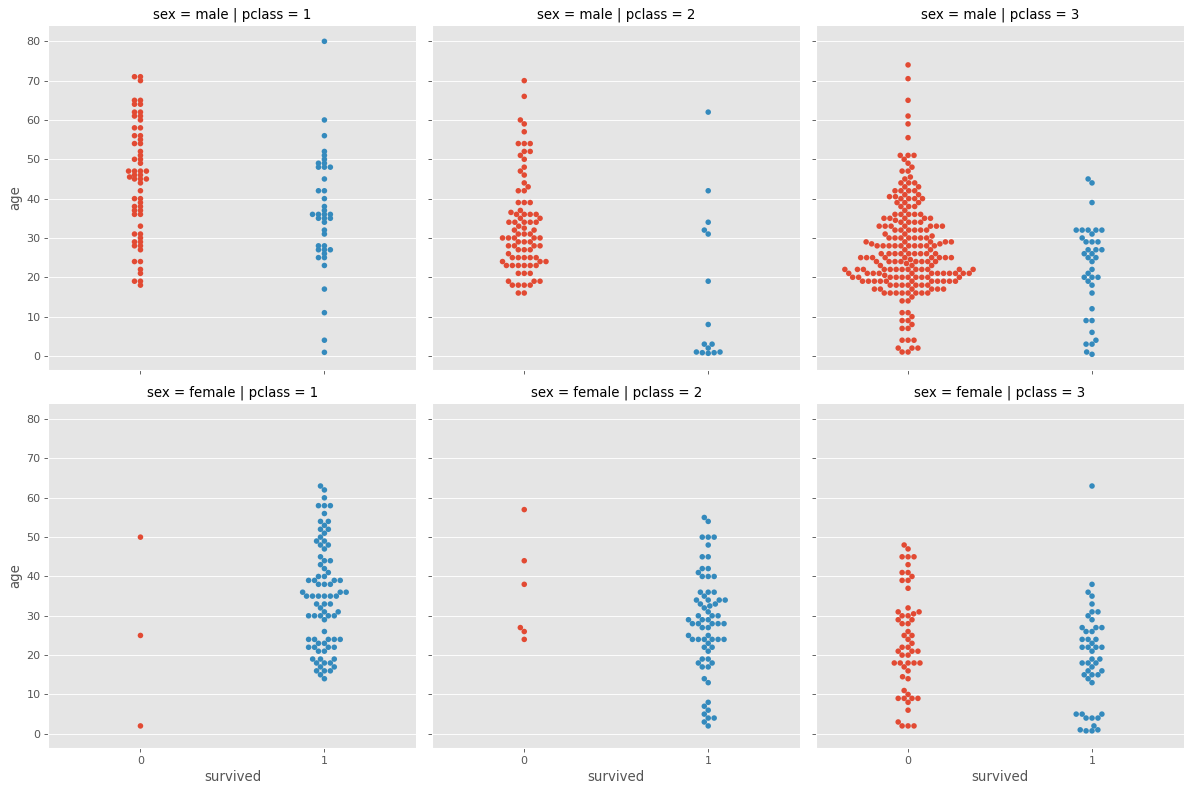

In [61]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', row = 'sex', col = 'pclass')

# Fare

**Histogram of Fare.**

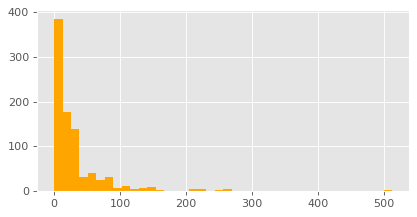

In [62]:
titanic['fare'].hist(bins = 40, color = 'orange')

**DistPlot of Fare.**

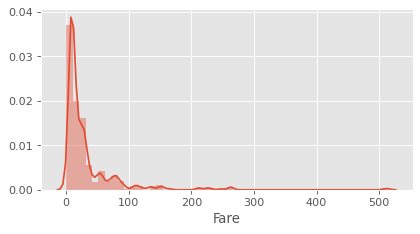

In [63]:
sns.distplot(titanic['fare'])
plt.xlabel('Fare')
plt.show()

**KDEPlot of Fare.**

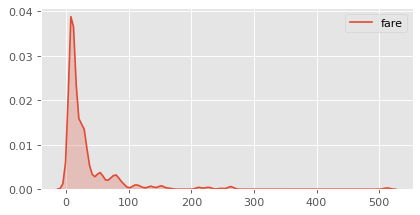

In [64]:
sns.kdeplot(titanic['fare'], shade = True)

**Box CatPlot of Sex vs Fare.**

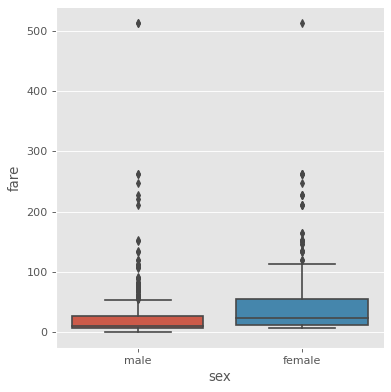

In [65]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box')

**Box CatPlot of Sex vs Fare based on PClass.**

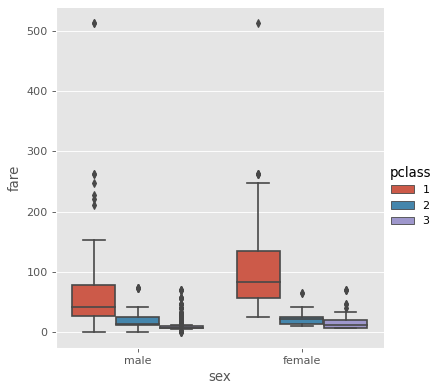

In [66]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', hue = 'pclass')

**Box CatPlot of Sex vs Fare based on PClass Columnwise.**

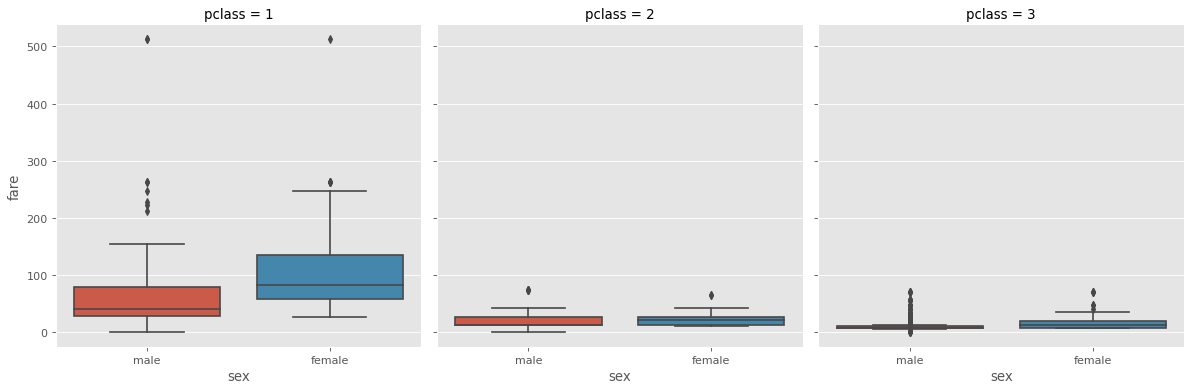

In [67]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', col = 'pclass')

**Boxen CatPlot of Sex vs Fare based on PClass Columnwise.**

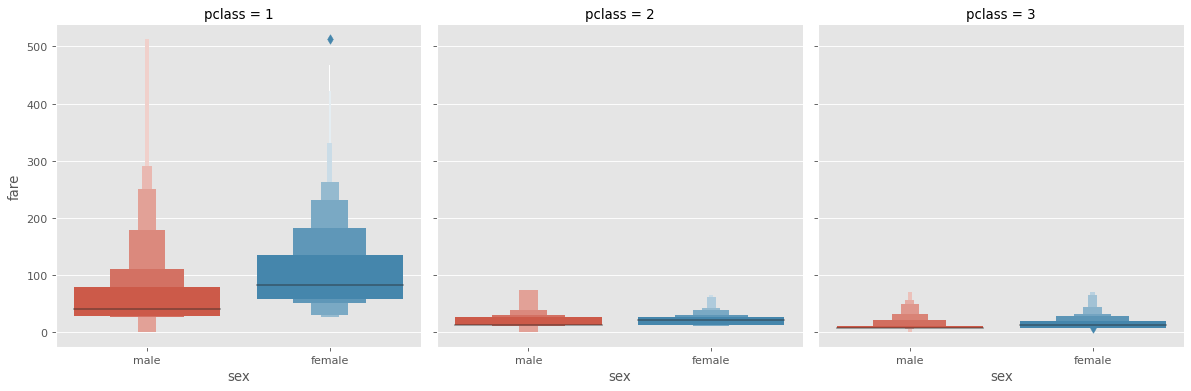

In [68]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'boxen', col = 'pclass')

**Swarm CatPlot of PClass vs Fare based on Sex Columnwise.**

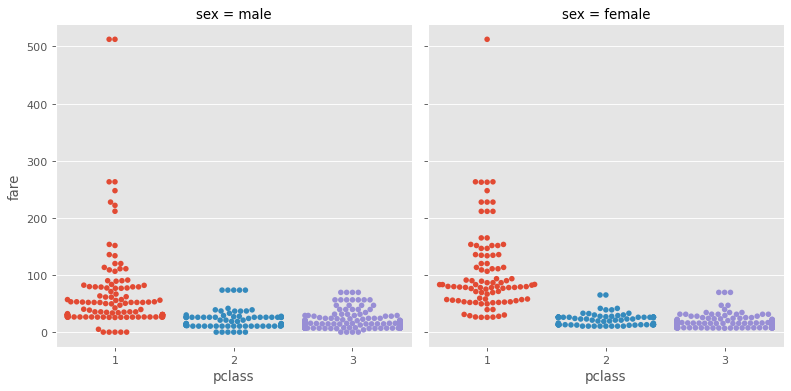

In [69]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')

**Swarm CatPlot of Survived vs Fare based on Sex Columnwise.**

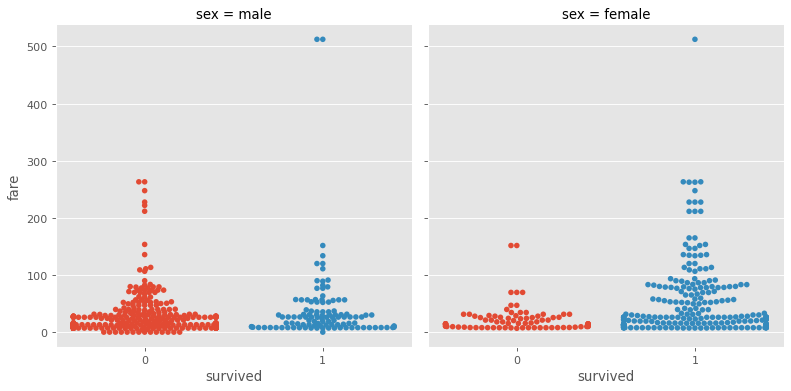

In [70]:
sns.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')

**Swarm CatPlot of Survived vs Fare based on PClass Columnwise.**

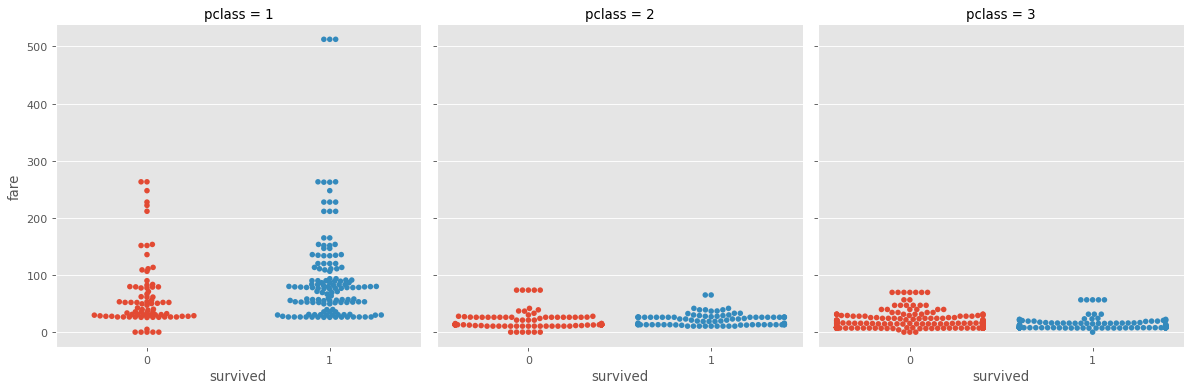

In [71]:
sns.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass')

**JointPlot of Age vs Fare.**

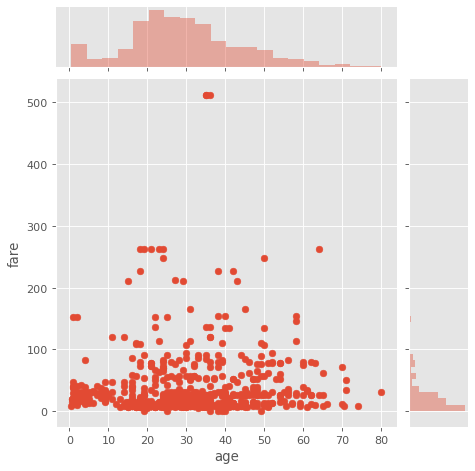

In [72]:
sns.jointplot(x = 'age', y = 'fare', data = titanic)

**KDE JointPlot of Age vs Fare.**

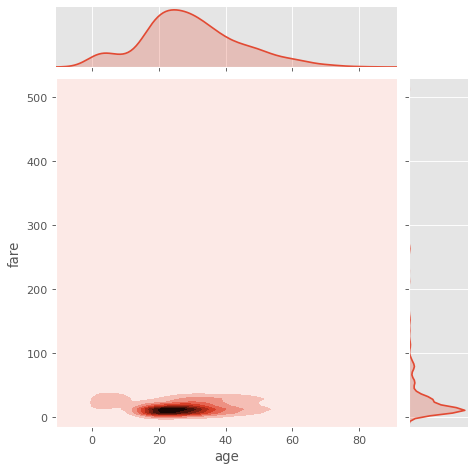

In [73]:
sns.jointplot(x = 'age', y = 'fare', data = titanic, kind = 'kde')

**RelPlot of Age vs Fare based on Sex Rowwise and PClass Columnwise.**

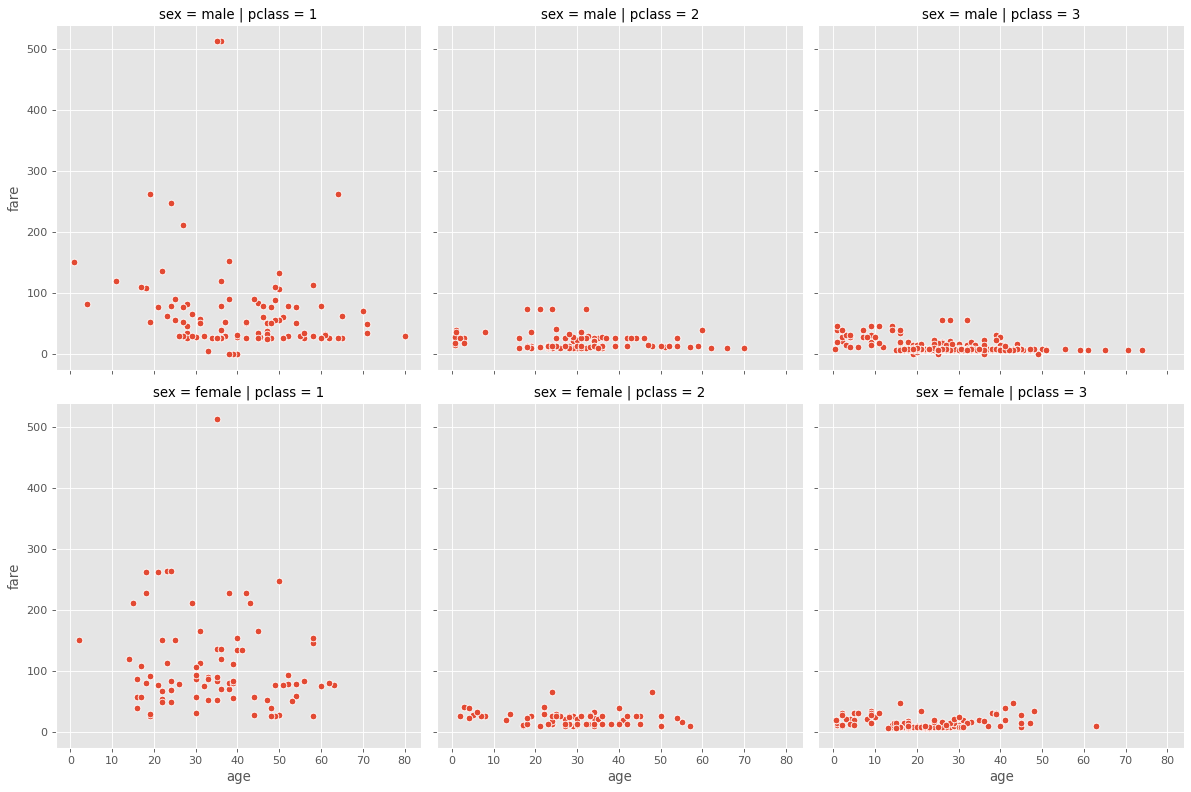

In [74]:
sns.relplot(x = 'age', y = 'fare', data = titanic, row = 'sex', col = 'pclass')

# SibSp

**Number of Siblings/Spouses Aboard.**

In [75]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

**CountPlot of Number of Siblings/Spouses Aboard.**

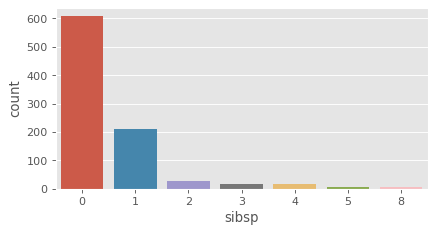

In [76]:
sns.countplot('sibsp', data = titanic)

**CountPlot of Number of Siblings/Spouses Aboard based on Survial.**

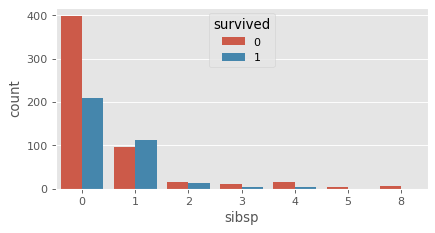

In [77]:
sns.countplot('sibsp', data = titanic, hue = 'survived')

**Bar CatPlot of Sibsp vs Survived.**

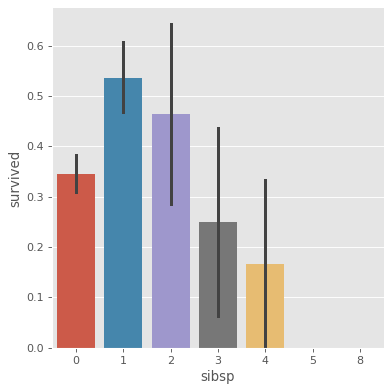

In [78]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic)

**Bar CatPlot of Sibsp vs Survived based on Sex.**

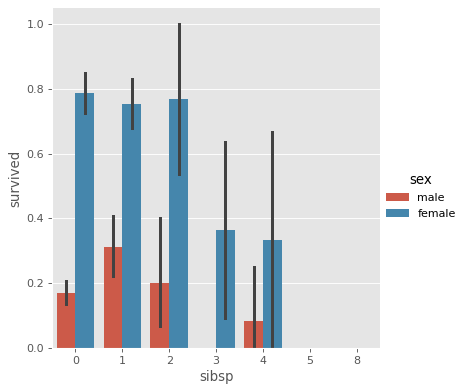

In [79]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, hue = 'sex')

**Bar CatPlot of Sibsp vs Survived based on Sex Columnwise.**

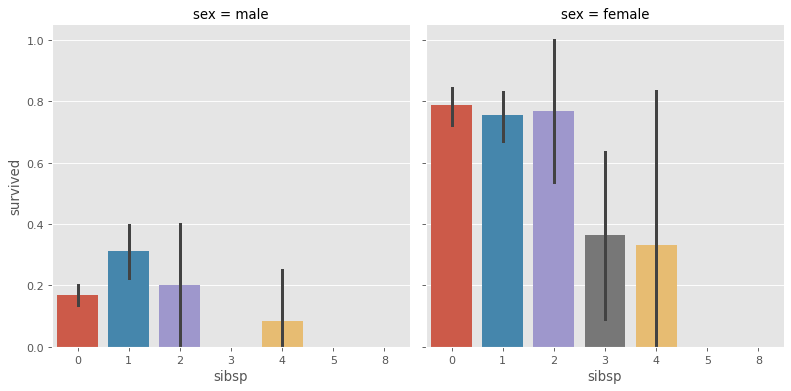

In [80]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

**Bar CatPlot of Sibsp vs Survived based on PClass Columnwise.**

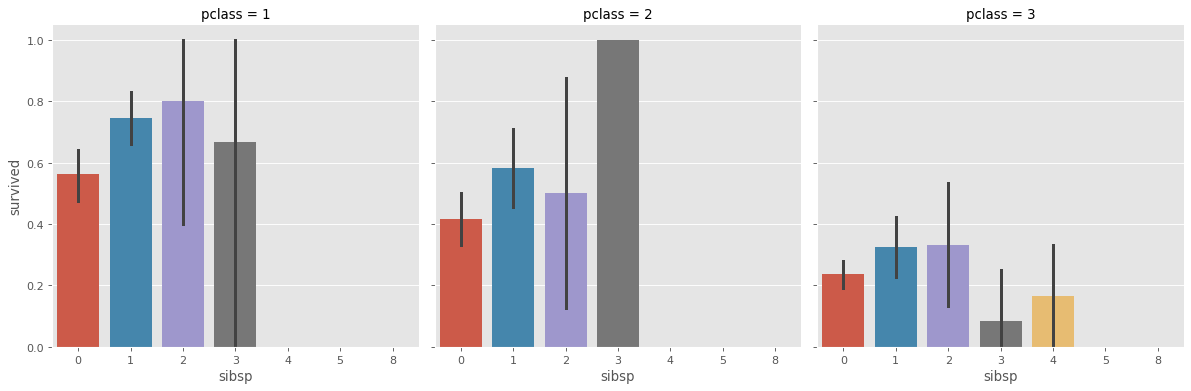

In [81]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'pclass')

**Point CatPlot of Sibsp vs Survived.**

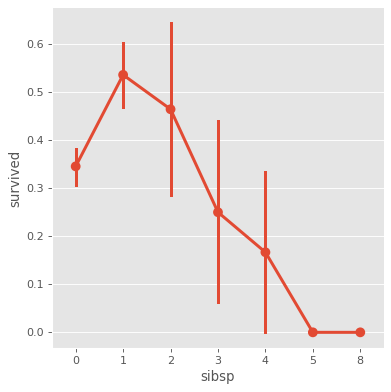

In [82]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic)

**Point CatPlot of Sibsp vs Survived based on Sex.**

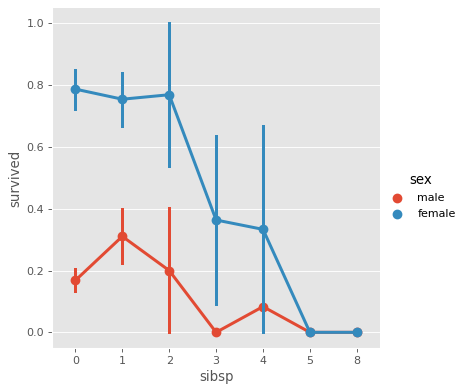

In [83]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic, hue = 'sex')

**Point CatPlot of Sibsp vs Survived based on PClass Columnwise.**

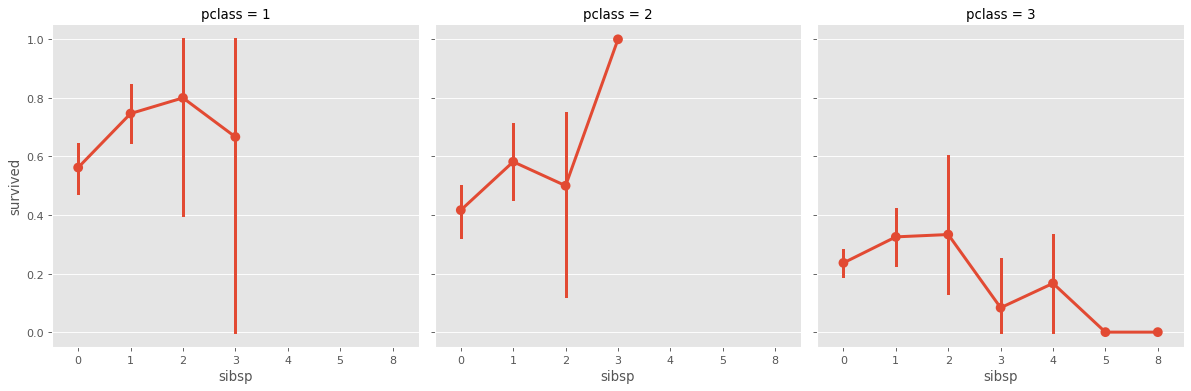

In [84]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic, col = 'pclass')

**Swarm CatPlot of Sibsp vs Fare based on Sex Columnwise.**

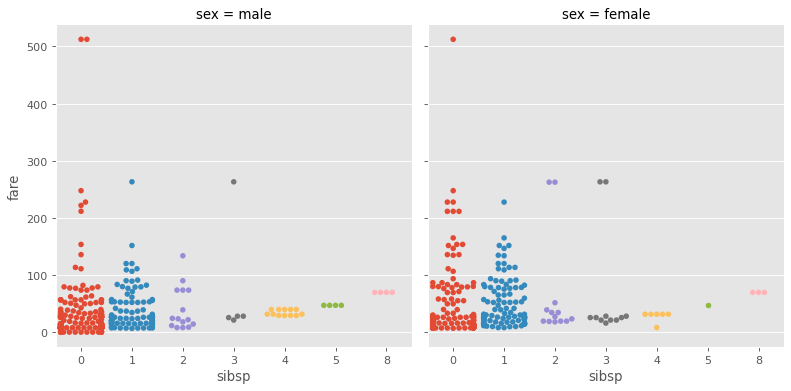

In [85]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')

**Swarm CatPlot of Sibsp vs Fare based on PClass Columnwise.**

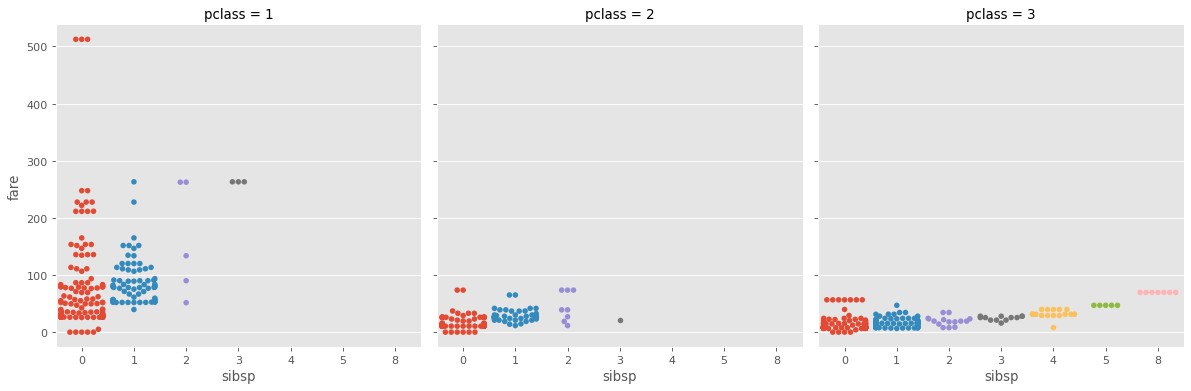

In [86]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass')

**Swarm CatPlot of Sibsp vs Fare based on PClass Columnwise and Sex Rowwise.**

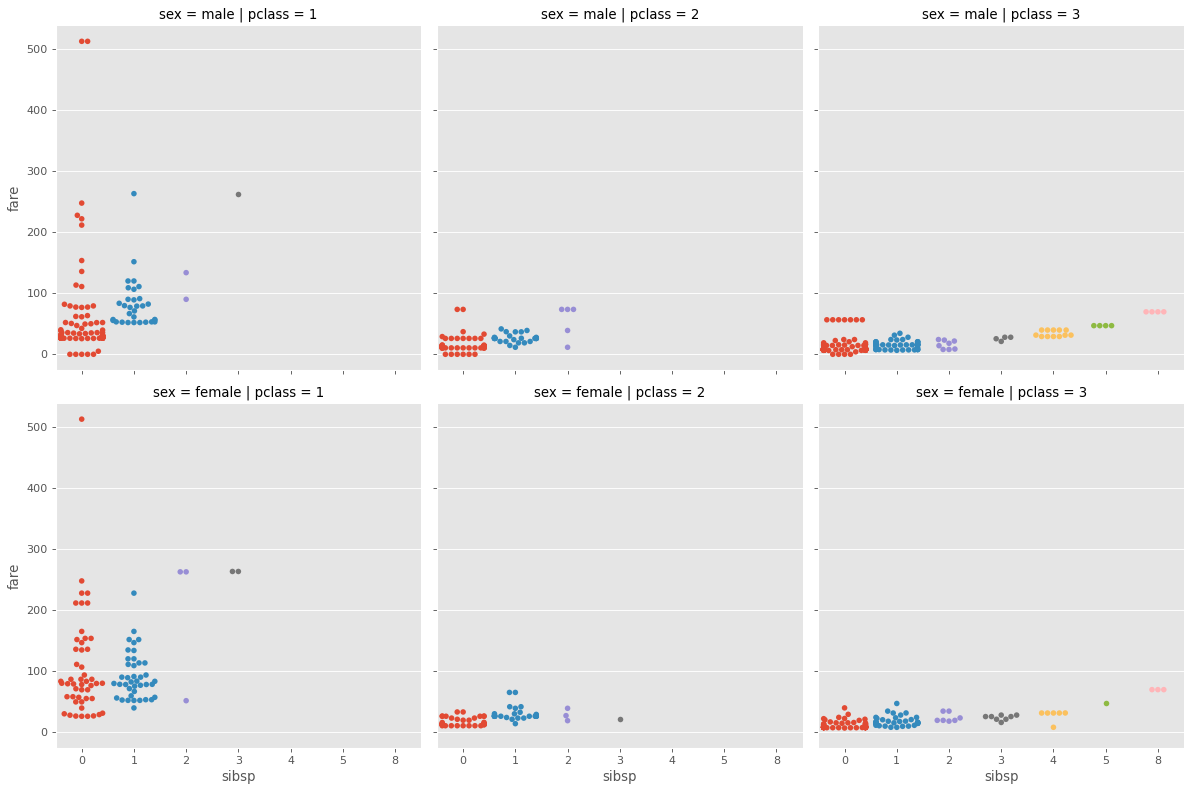

In [87]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex')

# Parch 

**Number of Parents/Children Aboard.**

In [88]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

**Count Plot of Number of Parents/Children Aboard.**

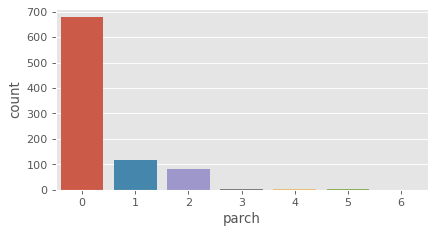

In [89]:
sns.countplot('parch', data = titanic)

**Count Plot of Number of Parents/Children Aboard based on Sex.**

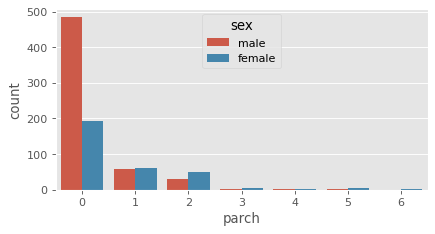

In [90]:
sns.countplot('parch', data = titanic, hue = 'sex')

**Bar CatPlot of Parch vs Survived.**

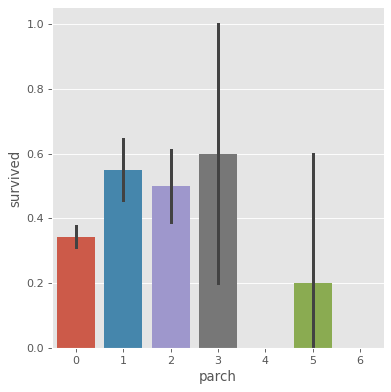

In [91]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar')

**Bar CatPlot of Parch vs Survived based on Sex.**

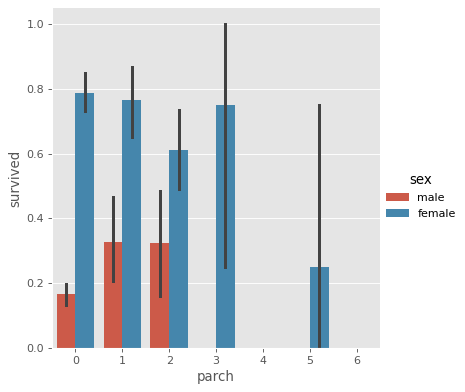

In [92]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar', hue = 'sex')

**Swarm CatPlot of Parch vs Fare.**

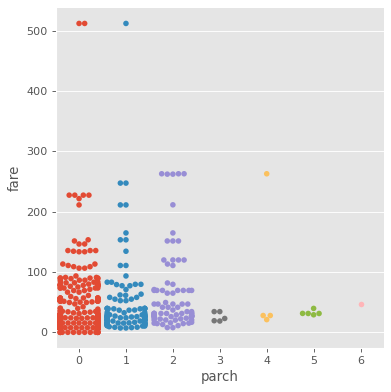

In [93]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm')

**Swarm CatPlot of Parch vs Fare based on Sex Columnwise.**

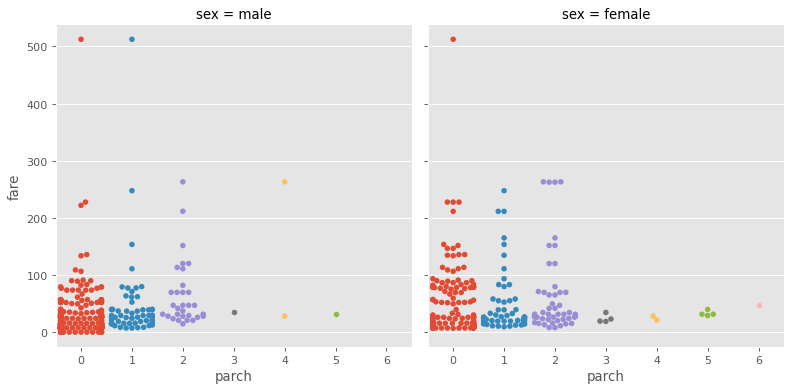

In [94]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')

**Swarm CatPlot of Parch vs Fare based on PClass Columnwise.**

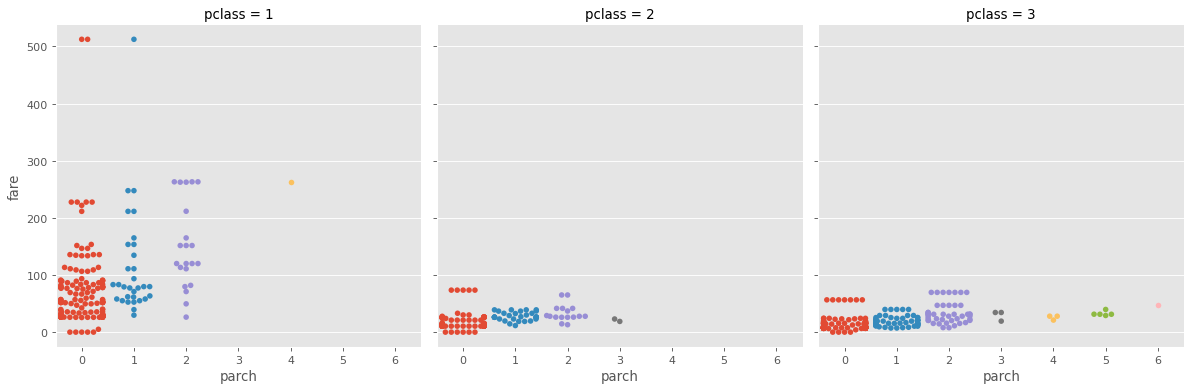

In [95]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass')

**Swarm CatPlot of Parch vs Fare based on PClass Columnwise and Sex Rowwise.**

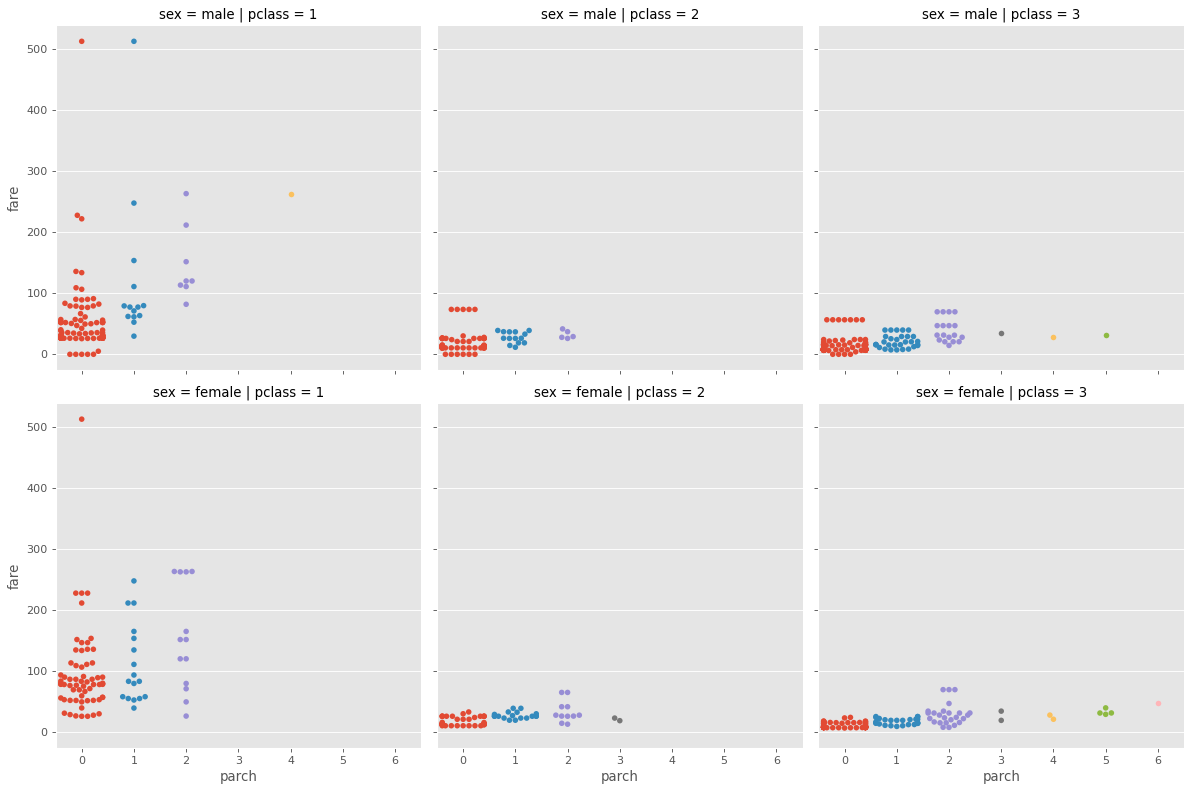

In [96]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex')

# Embarked 

**Type of Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).**

In [97]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

**Count Plot of Embarked.**

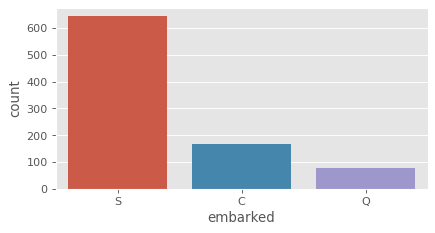

In [98]:
sns.countplot('embarked', data = titanic)

**Count Plot of Embarked based on Survival.**

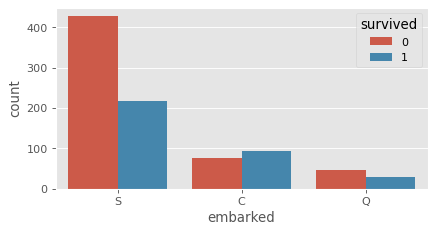

In [99]:
sns.countplot('embarked', data = titanic, hue = 'survived')

**Bar CatPlot of Embarked vs Survived.**

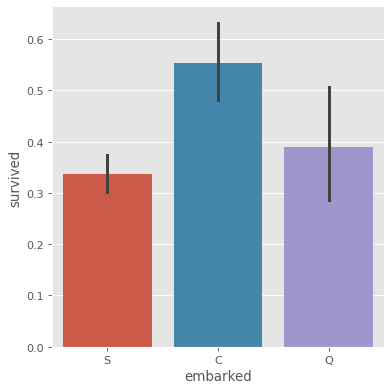

In [100]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic)

**Bar CatPlot of Embarked vs Survived based on Sex.**

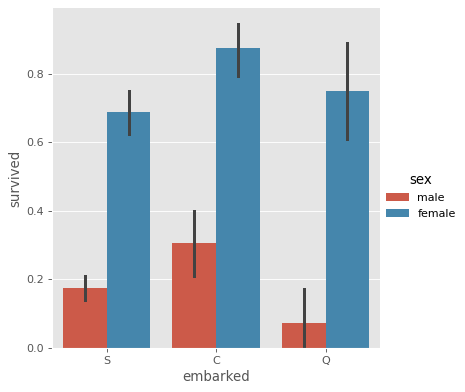

In [101]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, hue = 'sex')

**Bar CatPlot of Embarked vs Survived based on Sex Columnwise.**

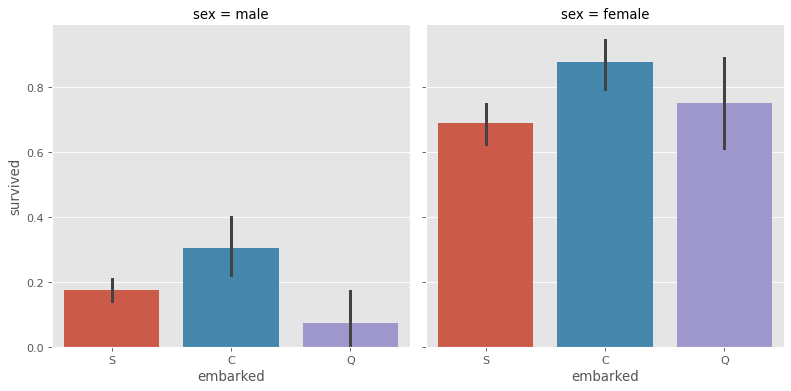

In [102]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

# Who

**Who means the type of person i.e. man, woman and child.**

In [104]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

**Count Plot of Who.**

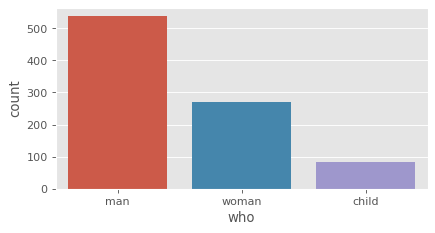

In [105]:
sns.countplot('who', data = titanic)

**Count Plot of Who based on Survival.**

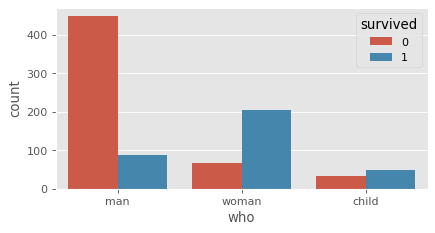

In [106]:
sns.countplot('who', data = titanic, hue = 'survived')

**Bar CatPlot of Who vs Survived.**

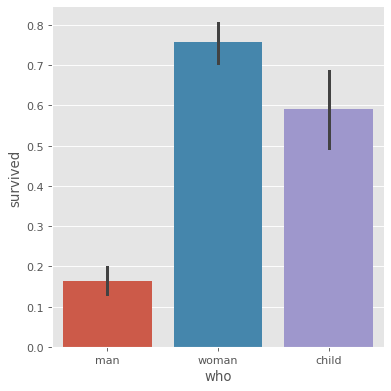

In [107]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic)

**Bar CatPlot of Who vs Survived based on PClass.**

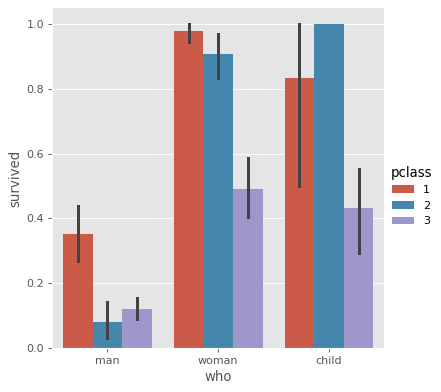

In [108]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')

**Bar CatPlot of Who vs Survived based on Parch Columnwise.**

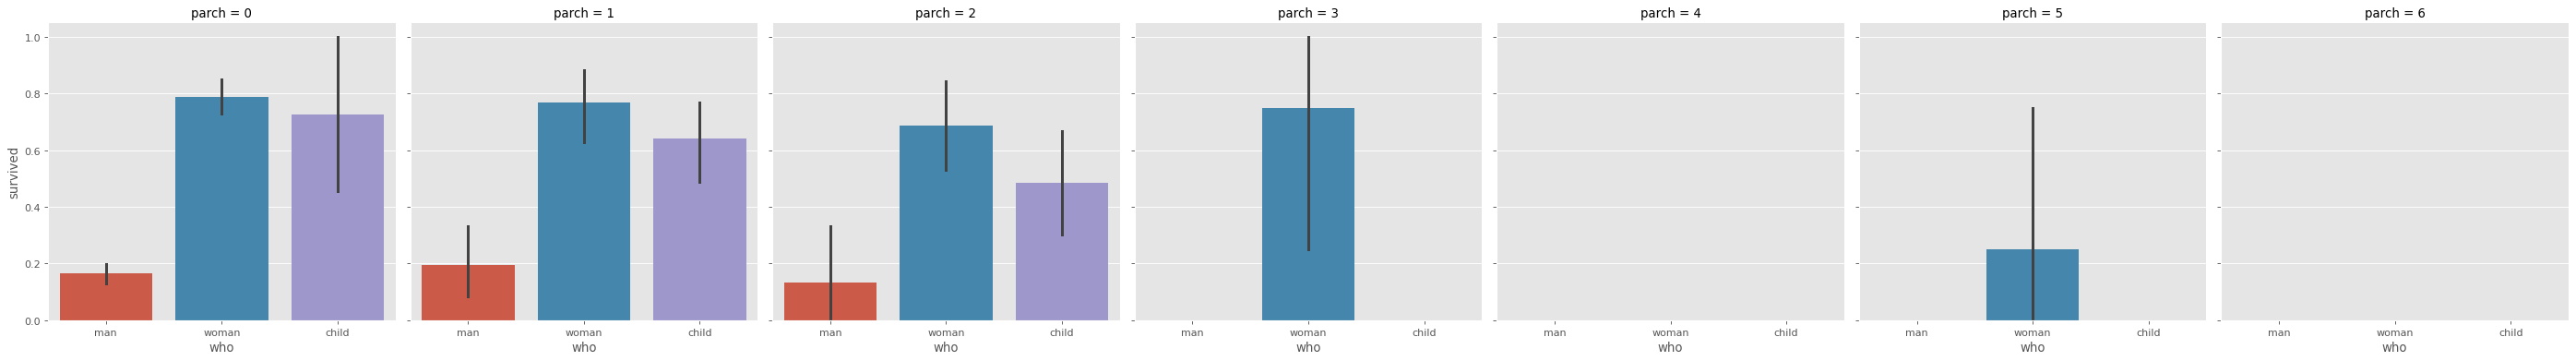

In [109]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, col = 'parch')